In [5]:
from langgraph.graph import StateGraph,START,END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict
from dotenv import load_dotenv

In [6]:
load_dotenv()

True

In [7]:
class llm_state(TypedDict):
    ques:str
    ans:str

In [8]:
model=ChatGoogleGenerativeAI(
    model='gemini-2.5-flash'
)

In [9]:
def generate_answer(state:llm_state)->llm_state:
    ques=state['ques']
    prompt=f'Answer the following question: {ques}'
    res=model.invoke(prompt).content
    state['ans']=res
    return state

In [10]:
#Define graph
graph=StateGraph(llm_state)

graph.add_node('generate_answer',generate_answer)

graph.add_edge(START,'generate_answer')
graph.add_edge('generate_answer',END)

workflow=graph.compile()

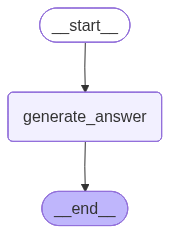

In [11]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [12]:
initial_state={'ques':'What is the height of mt. everest'}
final_state=workflow.invoke(initial_state)
print(final_state['ans'])

The height of Mount Everest is officially recognized as **8,848.86 meters (29,031.7 feet)**.

This updated figure was jointly announced by China and Nepal in December 2020, after conducting their own separate surveys. Prior to this, the most commonly cited height was 8,848 meters.
